In [100]:
import numpy as np
import pandas as pd
import random
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt 

class KNNClassifier:
    train_data = pd.DataFrame()
    k = None
    
    def train_validation_split(self,data_frm,validation_data_size):
        if isinstance(validation_data_size, float):
            validation_data_size=round(validation_data_size * len(data_frm))

        indices=data_frm.index.tolist()

        valid_indices=random.sample(indices, validation_data_size)
        valid_datafrm=data_frm.loc[valid_indices]

        train_datafrm=data_frm.drop(valid_indices)

        return train_datafrm, valid_datafrm
    
    def createDistanceLabelEuclidean(self, test_sample):
        results_dist_label=[]
        for li in self.train_data:
            test_list=test_sample[0:]
            train_list=li[1:]
            dist=np.linalg.norm(test_list-train_list)
            results_dist_label.append([dist,li[0]])

        results_dist_label.sort()

        return results_dist_label
    
    def createDistanceLabelManhattan(self, test_sample):
        results_dist_label=[]
        for li in self.train_data:
            test_list=test_sample[0:]
            train_list=li[1:]
            dist=np.sum(np.absolute(test_list - train_list))
            results_dist_label.append([dist,li[0]])

        results_dist_label.sort()

        return results_dist_label
    
    def getPredictedLabelValue(self,results_dist_label):
        label_count={}
        for i in range(self.k):
            val = results_dist_label[i][1]
            if val in label_count:
                label_count[val]+=1
            else:
                label_count[val]=1

    #     for ky,vl in label_count.items():
    #         print(ky,":",vl)

        return max(label_count,key=label_count.get)
    
    
    def getPredictedLabels(self, validation_data):
        predicted_list=[]

        for test_sample in validation_data:
#             results_dist_label = self.createDistanceLabelEuclidean(test_sample)
            results_dist_label = self.createDistanceLabelManhattan(test_sample)
            predicted_label = self.getPredictedLabelValue(results_dist_label)
            predicted_list.append(predicted_label)
        return predicted_list
    
    def check_validation(self,train_data_frm, validation_data_size):
        random.seed(0)
        train_data_frm , validation_data_frm = self.train_validation_split(train_data_frm, validation_data_size)
        self.train_data = train_data_frm.values
        
        validation_data_labels = validation_data_frm.iloc[:,0].to_frame().values.tolist()
        validation_data_frm = validation_data_frm.drop([validation_data_frm.columns[0]],  axis='columns')
        validation_data = validation_data_frm.values
        accuracy_scores_list = []
        f1_scores_list = []
        k_values = [1,2,3,5,6,7,9]
        for k_val in k_values:
            print(k_val)
            self.k = k_val
            predicted_labels = self.getPredictedLabels(validation_data)
            accuracy_scores_list.append(accuracy_score(validation_data_labels, predicted_labels))
            f1_scores_list.append(f1_score(validation_data_labels, predicted_labels, average='micro', zero_division='warn'))
        return accuracy_scores_list, f1_scores_list
   
    def train(self,train_data_path):
        train_data_frm = pd.read_csv(train_data_path)
        self.k = 3
#         accuracy_scores_list , f1_scores_list = self.check_validation(train_data_frm, validation_data_size = 2000)
        self.train_data = train_data_frm.values
#         return accuracy_scores_list , f1_scores_list
    
    def predict(self,test_path):
        test_data_frm = pd.read_csv(test_path, header=None)
        predicted_labels = self.getPredictedLabels(test_data_frm.values)
        return predicted_labels
               
        

In [89]:
knn_classifier = KNNClassifier()
# knn_classifier.train('/home/jyoti/Documents/SMAI/assign1/q1/train.csv')
# predictions = knn_classifier.predict('/home/jyoti/Documents/SMAI/assign1/q1/test.csv')
# test_labels = list()
# with open('/home/jyoti/Documents/SMAI/assign1/q1/test_labels.csv') as f:
#   for line in f:
#     test_labels.append(int(line))
# print (accuracy_score(test_labels, predictions))

## Report for Euclidean Distance

In [50]:
accuracy_scores_list , f1_scores_list = knn_classifier.train('/home/jyoti/Documents/SMAI/assign1/q1/train.csv')
print(accuracy_scores_list)
print(f1_scores_list)

1
2
3
5
6
7
9
[0.962, 0.962, 0.9595, 0.959, 0.961, 0.9575, 0.9575]
[0.962, 0.962, 0.9595, 0.959, 0.961, 0.9575, 0.9575]


In [60]:
k_values = [1,2,3,5,6,7,9]

### 1. Plot k vs Accuracy Score

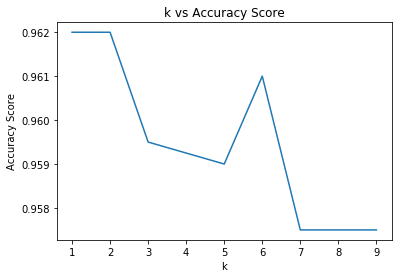

In [63]:
plt.plot(k_values, accuracy_scores_list) 
plt.xlabel('k') 
plt.ylabel('Accuracy Score') 
plt.title('k vs Accuracy Score') 
plt.show() 

### 2. Plot k vs F1 Score

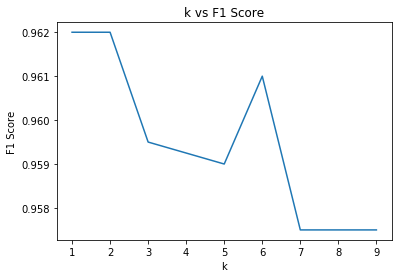

In [62]:
plt.plot(k_values, f1_scores_list) 
plt.xlabel('k') 
plt.ylabel('F1 Score') 
plt.title('k vs F1 Score') 
plt.show()

### Report of Test Data

In [69]:
knn_classifier = KNNClassifier()
knn_classifier.train('/home/jyoti/Documents/SMAI/assign1/q1/train.csv')
predictions = knn_classifier.predict('/home/jyoti/Documents/SMAI/assign1/q1/test.csv')
test_labels = list()
with open('/home/jyoti/Documents/SMAI/assign1/q1/test_labels.csv') as f:
  for line in f:
    test_labels.append(int(line))

### 1. Accuracy Score 

In [70]:
print(accuracy_score(test_labels,predictions))

0.969


### 2. F1 Score

In [72]:
print(f1_score(test_labels, predictions, average='micro', zero_division='warn'))

0.969


### 3. Confusion Matrix

In [75]:
print(confusion_matrix(test_labels, predictions))

[[ 93   0   0   0   0   0   1   0   0   0]
 [  0 101   0   0   0   0   0   0   0   0]
 [  0   0 107   0   0   0   0   1   0   0]
 [  0   0   0 107   0   0   1   0   0   0]
 [  0   1   0   0  83   0   1   0   0   6]
 [  0   0   0   1   0  79   0   0   1   0]
 [  0   0   0   0   0   0 101   0   0   0]
 [  0   2   1   0   1   0   0  97   0   3]
 [  1   0   1   3   0   2   0   0  93   0]
 [  1   0   1   0   0   0   0   2   0 108]]


### 4. Classification Report

In [93]:
print(classification_report(test_labels, predictions))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98        94
           1       0.97      1.00      0.99       101
           2       0.97      0.99      0.98       108
           3       0.96      0.99      0.98       108
           4       0.99      0.91      0.95        91
           5       0.98      0.98      0.98        81
           6       0.97      1.00      0.99       101
           7       0.97      0.93      0.95       104
           8       0.99      0.93      0.96       100
           9       0.92      0.96      0.94       112

    accuracy                           0.97      1000
   macro avg       0.97      0.97      0.97      1000
weighted avg       0.97      0.97      0.97      1000



## Report for Manhattan Distance

In [90]:
accuracy_scores_list_M , f1_scores_list_M = knn_classifier.train('/home/jyoti/Documents/SMAI/assign1/q1/train.csv')
print(accuracy_scores_list_M)
print(f1_scores_list_M)

1
2
3
5
6
7
9
[0.953, 0.953, 0.951, 0.949, 0.9505, 0.949, 0.9475]
[0.953, 0.953, 0.951, 0.949, 0.9505, 0.949, 0.9475]


### 1. Plot k vs Accuracy Score

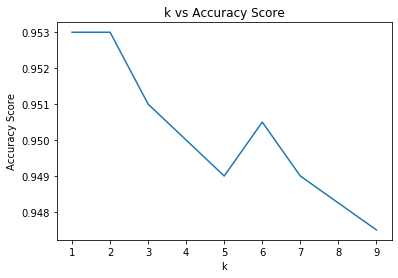

In [94]:
plt.plot(k_values, accuracy_scores_list_M) 
plt.xlabel('k') 
plt.ylabel('Accuracy Score') 
plt.title('k vs Accuracy Score') 
plt.show() 

### 2. Plot k vs F1 Score

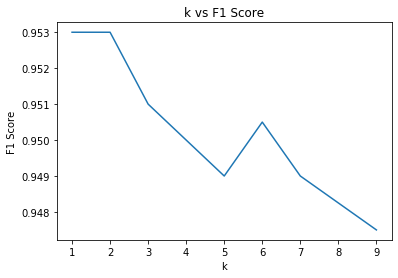

In [95]:
plt.plot(k_values, f1_scores_list_M) 
plt.xlabel('k') 
plt.ylabel('F1 Score') 
plt.title('k vs F1 Score') 
plt.show()

### Report of Test Data

In [101]:
knn_classifier = KNNClassifier()
knn_classifier.train('/home/jyoti/Documents/SMAI/assign1/q1/train.csv')
predictions_M = knn_classifier.predict('/home/jyoti/Documents/SMAI/assign1/q1/test.csv')
test_labels_M = list()
with open('/home/jyoti/Documents/SMAI/assign1/q1/test_labels.csv') as f:
  for line in f:
    test_labels_M.append(int(line))

### 1. Accuracy Score

In [103]:
print(accuracy_score(test_labels_M,predictions_M))

0.957


### 2. F1 Score

In [104]:
print(f1_score(test_labels_M, predictions_M, average='micro', zero_division='warn'))

0.957


### 3. Confusion Matrix

In [105]:
print(confusion_matrix(test_labels_M, predictions_M))

[[ 93   0   0   0   0   1   0   0   0   0]
 [  0 101   0   0   0   0   0   0   0   0]
 [  0   1 104   1   0   0   0   2   0   0]
 [  0   0   0 106   0   1   1   0   0   0]
 [  0   2   0   0  81   0   1   0   0   7]
 [  0   0   0   2   0  78   0   0   1   0]
 [  0   0   0   0   0   0 101   0   0   0]
 [  0   4   0   0   1   0   0  96   0   3]
 [  1   0   1   4   0   2   0   0  91   1]
 [  1   0   1   0   1   0   0   3   0 106]]


### 4. Classification Report

In [106]:
print(classification_report(test_labels_M, predictions_M))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98        94
           1       0.94      1.00      0.97       101
           2       0.98      0.96      0.97       108
           3       0.94      0.98      0.96       108
           4       0.98      0.89      0.93        91
           5       0.95      0.96      0.96        81
           6       0.98      1.00      0.99       101
           7       0.95      0.92      0.94       104
           8       0.99      0.91      0.95       100
           9       0.91      0.95      0.93       112

    accuracy                           0.96      1000
   macro avg       0.96      0.96      0.96      1000
weighted avg       0.96      0.96      0.96      1000



## Performance of Scikit-learn's Classifier

In [122]:
from sklearn.neighbors import KNeighborsClassifier

train_data_frm = pd.read_csv('/home/jyoti/Documents/SMAI/assign1/q1/train.csv')
train_labels = train_data_frm.iloc[:,0].values
train_d = train_data_frm.iloc[:,1:].values
test_d = pd.read_csv('/home/jyoti/Documents/SMAI/assign1/q1/test.csv', header=None).values
num_of_neigh = KNeighborsClassifier(n_neighbors=3)
num_of_neigh.fit(train_d, train_labels)
predictions_knn = num_of_neigh.predict(test_d)

(19999,)
(19999, 784)


### 1. Accuracy Score

In [116]:
print(accuracy_score(test_labels,predictions_knn))

0.967


### 2. F1 Score

In [118]:
print(f1_score(test_labels, predictions_knn, average='micro', zero_division='warn'))

0.967


### 3. Confusion Matrix

In [119]:
print(confusion_matrix(test_labels, predictions_knn))

[[ 93   0   0   0   0   0   1   0   0   0]
 [  0 101   0   0   0   0   0   0   0   0]
 [  0   0 107   0   0   0   0   1   0   0]
 [  0   0   0 107   0   0   1   0   0   0]
 [  0   1   0   0  83   0   1   0   0   6]
 [  0   0   0   1   0  79   0   0   1   0]
 [  0   0   0   0   0   0 101   0   0   0]
 [  0   2   1   0   1   0   0  97   0   3]
 [  1   0   2   2   0   2   0   0  93   0]
 [  2   0   1   0   1   1   0   1   0 106]]


### 4. Classification Report

In [121]:
print(classification_report(test_labels, predictions_knn))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        94
           1       0.97      1.00      0.99       101
           2       0.96      0.99      0.98       108
           3       0.97      0.99      0.98       108
           4       0.98      0.91      0.94        91
           5       0.96      0.98      0.97        81
           6       0.97      1.00      0.99       101
           7       0.98      0.93      0.96       104
           8       0.99      0.93      0.96       100
           9       0.92      0.95      0.93       112

    accuracy                           0.97      1000
   macro avg       0.97      0.97      0.97      1000
weighted avg       0.97      0.97      0.97      1000

